In [9]:
import os
import shutil
from collections import defaultdict
import zipfile

In [10]:
#Unizp file
with zipfile.ZipFile("bbc.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

In [15]:
#Rename files for each category
base_folder = 'bbc'
num_files = 0

#Change filename in folders
for sub_folder in os.listdir(base_folder):
    for file in os.listdir(os.path.join(base_folder,sub_folder)):
        if file.endswith('.txt'):
            file_path = os.path.join(base_folder,sub_folder, file)
            new_file_path = os.path.join(base_folder,sub_folder, sub_folder+"_"+file)
            os.rename(file_path, new_file_path)
            num_files += 1

print(num_files)

2225


In [14]:
#Count categories in every new group
base_folder = 'new_categories'
categories = []
num_files = 0

i = 0
#Search all files in folders
for sub_folder in os.listdir(base_folder):
    categories.append(defaultdict(int))
    for file in os.listdir(os.path.join(base_folder,sub_folder)):
        if file.endswith('.txt'):
            file_path = os.path.join(base_folder,sub_folder, file)
            name_start = file.split('_')[0]
            categories[i][name_start] += 1
            num_files += 1
    i+=1
    
print(categories)
print(num_files)

[defaultdict(<class 'int'>, {'business': 482, 'politics': 236, 'tech': 63, 'sport': 11, 'entertainment': 16}), defaultdict(<class 'int'>, {'politics': 151, 'business': 5, 'entertainment': 2}), defaultdict(<class 'int'>, {'entertainment': 347, 'politics': 19, 'sport': 4, 'tech': 11, 'business': 6}), defaultdict(<class 'int'>, {'tech': 323, 'entertainment': 3, 'politics': 5, 'business': 6}), defaultdict(<class 'int'>, {'sport': 496, 'entertainment': 18, 'politics': 6, 'business': 11, 'tech': 4})]
2225


In [6]:
#Delete files in folder
new_folder_path = "bbc/"
folders = os.listdir(new_folder_path)

for folder in folders:
    final_path = os.path.join(new_folder_path, folder)
    if os.path.isdir(final_path):
        try:
            shutil.rmtree(final_path)
        except Exception as e:
            print(f'Error deleting {final_path}: {str(e)}')

In [3]:
import pandas as pd

# Ruta del archivo CSV
train_filename = '2Dataset/train_40k.csv'

# Leer el archivo CSV en un DataFrame de pandas
train_data = pd.read_csv(train_filename)

# Contar el número de textos por categoría ('Cat3')
category_counts = train_data['Cat3'].value_counts()

# Obtener la ruta para guardar el archivo de salida
output_filename = 'category_counts.txt'

# Guardar los conteos de categoría (solo números) en un archivo de texto
with open(output_filename, 'w') as f:
    for count in category_counts:
        f.write(f"{count}\n")

# Imprimir en la consola los resultados
print("Conteos de categoría (solo números) guardados en", output_filename)
print(category_counts)


Conteos de categoría (solo números) guardados en category_counts.txt
Cat3
unknown                    2262
shaving hair removal       1565
vitamins supplements       1315
board games                 924
styling tools               850
                           ... 
stuffing                      1
breadsticks                   1
eggs                          1
chocolate covered fruit       1
spices gifts                  1
Name: count, Length: 464, dtype: int64


In [5]:
# Definir la función para sumar números desde un archivo
def sumar_numeros_desde_archivo(nombre_archivo):
    total = 0
    try:
        # Abrir el archivo en modo lectura
        with open(nombre_archivo, 'r') as archivo:
            # Leer cada línea del archivo
            for linea in archivo:
                # Convertir la línea a entero y sumarlo al total
                total += int(linea.strip())
        return total
    except FileNotFoundError:
        print(f"El archivo '{nombre_archivo}' no se encontró.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")

# Nombre del archivo que contiene los números
nombre_archivo = 'category_counts.txt'

# Llamar a la función para sumar los números del archivo
resultado = sumar_numeros_desde_archivo(nombre_archivo)

# Mostrar el resultado
print("La suma de los números es:", resultado)


La suma de los números es: 40000


In [2]:
#Txt to csv
import csv

# Nombre del archivo de entrada y salida
input_file = 'results_xlnet-base-cased.txt'
output_file = 'datos_xlnet.csv'

# Abrir el archivo de entrada en modo lectura
with open(input_file, 'r') as f:
    lines = f.readlines()

data = []
row = []

# Procesar las líneas del archivo
for line in lines:
    if line.startswith('Accuracy'):
        row.append(float(line.split(': ')[1].strip()))
    elif line.startswith('Precision'):
        row.append(float(line.split(': ')[1].strip()))
    elif line.startswith('Recall'):
        row.append(float(line.split(': ')[1].strip()))
    elif line.startswith('F1'):
        row.append(float(line.split(': ')[1].strip()))
        data.append(row)
        row = []

# Escribir los datos en un archivo CSV
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Escribir la cabecera
    writer.writerow(['Accuracy', 'Precision', 'Recall', 'F1'])
    # Escribir los datos
    for row in data:
        writer.writerow(row)
        
print(f"Se ha creado el archivo CSV '{output_file}' con los datos procesados.")

Se ha creado el archivo CSV 'datos_xlnet.csv' con los datos procesados.


In [4]:
#Txt to boxplot
# Nombre del archivo de entrada y salida
input_file = 'results_bert-base-uncased.txt'
output_file = 'datos_bert.txt'

# Abrir el archivo de entrada en modo lectura
with open(input_file, 'r') as f:
    lines = f.readlines()

data = []

# Procesar las líneas del archivo
for line in lines:
    if line.startswith('Accuracy'):
        data.append(line.split(': ')[1].strip())
    elif line.startswith('Precision'):
        data.append(line.split(': ')[1].strip())
    elif line.startswith('Recall'):
        data.append(line.split(': ')[1].strip())
    elif line.startswith('F1'):
        data.append(line.split(': ')[1].strip())

# Escribir los datos en un archivo de texto
with open(output_file, 'w') as txtfile:
    for i in range(0, len(data), 4):
        txtfile.write(' '.join(data[i:i+4]) + '\n')
        
print(f"Se ha creado el archivo de texto '{output_file}' con los datos procesados.")

Se ha creado el archivo de texto 'datos_bert.txt' con los datos procesados.


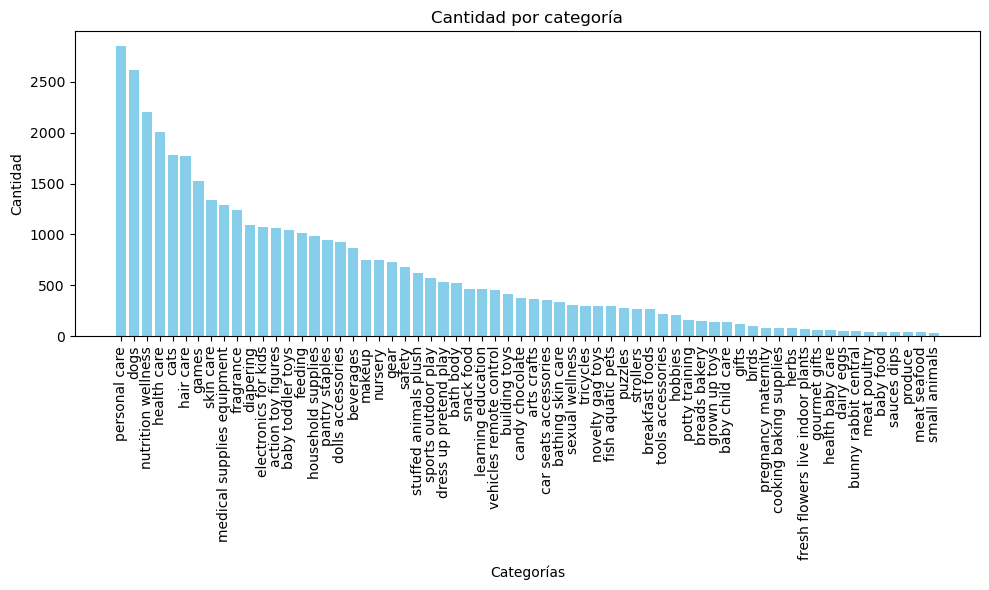

In [7]:
#DATA TO TABLE
import matplotlib.pyplot as plt

# Datos proporcionados como un solo string
data_str = """personal care                       2852
dogs                                2610
nutrition wellness                  2203
health care                         2002
cats                                1779
hair care                           1773
games                               1525
skin care                           1341
medical supplies equipment          1289
fragrance                           1237
diapering                           1095
electronics for kids                1073
action toy figures                  1066
baby toddler toys                   1041
feeding                             1016
household supplies                   984
pantry staples                       945
dolls accessories                    922
beverages                            866
makeup                               753
nursery                              748
gear                                 725
safety                               680
stuffed animals plush                624
sports outdoor play                  575
dress up pretend play                528
bath body                            522
snack food                           468
learning education                   462
vehicles remote control              456
building toys                        412
candy chocolate                      377
arts crafts                          361
car seats accessories                360
bathing skin care                    332
sexual wellness                      307
tricycles                            299
novelty gag toys                     299
fish aquatic pets                    294
puzzles                              273
strollers                            265
breakfast foods                      263
tools accessories                    220
hobbies                              210
potty training                       156
breads bakery                        152
grown up toys                        140
baby child care                      135
gifts                                119
birds                                 99
pregnancy maternity                   84
cooking baking supplies               79
herbs                                 76
fresh flowers live indoor plants      75
gourmet gifts                         66
health baby care                      57
dairy eggs                            53
bunny rabbit central                  51
meat poultry                          42
baby food                             40
sauces dips                           40
produce                               38
meat seafood                          37
small animals                         29"""

# Parsear los datos en listas separadas de nombres y cantidades
names = []
quantities = []
for line in data_str.split('\n'):
    name, quantity = line.rsplit(maxsplit=1)
    names.append(name.strip())
    quantities.append(int(quantity))

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(names, quantities, color='skyblue')  # Gráfica de barras vertical
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y
plt.title('Cantidad por categoría')  # Título de la gráfica
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar la gráfica



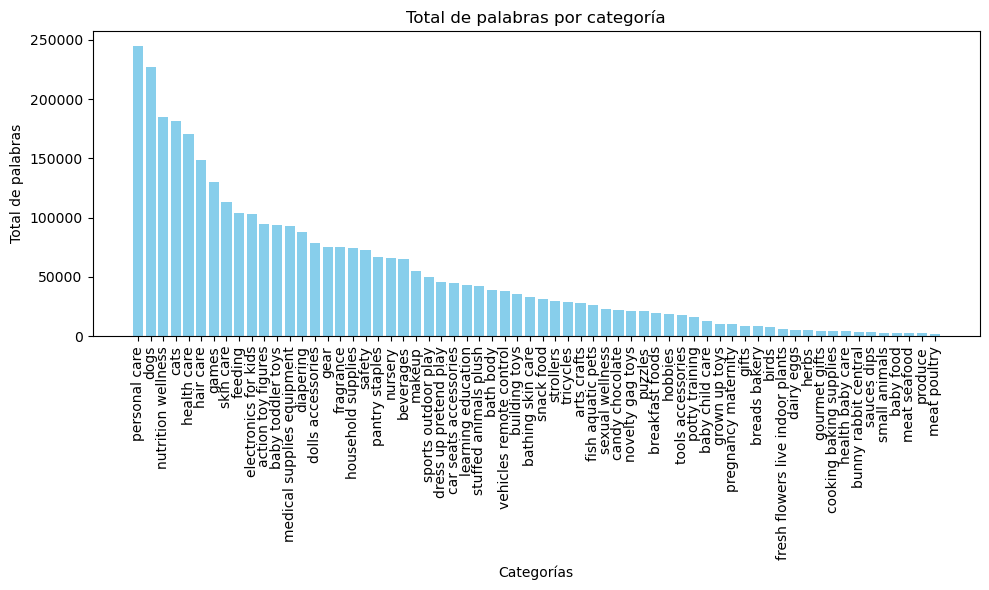

In [9]:
import matplotlib.pyplot as plt

# String de datos proporcionado
data_str = """Categoría: personal care, Total de palabras: 245055
Categoría: dogs, Total de palabras: 227255
Categoría: nutrition wellness, Total de palabras: 185036
Categoría: cats, Total de palabras: 181561
Categoría: health care, Total de palabras: 170758
Categoría: hair care, Total de palabras: 149002
Categoría: games, Total de palabras: 129984
Categoría: skin care, Total de palabras: 112938
Categoría: feeding, Total de palabras: 104384
Categoría: electronics for kids, Total de palabras: 103189
Categoría: action toy figures, Total de palabras: 94948
Categoría: baby toddler toys, Total de palabras: 93596
Categoría: medical supplies equipment, Total de palabras: 92655
Categoría: diapering, Total de palabras: 88272
Categoría: dolls accessories, Total de palabras: 79004
Categoría: gear, Total de palabras: 75509
Categoría: fragrance, Total de palabras: 75026
Categoría: household supplies, Total de palabras: 74251
Categoría: safety, Total de palabras: 72636
Categoría: pantry staples, Total de palabras: 66670
Categoría: nursery, Total de palabras: 65811
Categoría: beverages, Total de palabras: 65079
Categoría: makeup, Total de palabras: 54898
Categoría: sports outdoor play, Total de palabras: 50191
Categoría: dress up pretend play, Total de palabras: 46067
Categoría: car seats accessories, Total de palabras: 44825
Categoría: learning education, Total de palabras: 43214
Categoría: stuffed animals plush, Total de palabras: 42420
Categoría: bath body, Total de palabras: 39007
Categoría: vehicles remote control, Total de palabras: 38337
Categoría: building toys, Total de palabras: 35750
Categoría: bathing skin care, Total de palabras: 32984
Categoría: snack food, Total de palabras: 31149
Categoría: strollers, Total de palabras: 29390
Categoría: tricycles, Total de palabras: 28710
Categoría: arts crafts, Total de palabras: 27685
Categoría: fish aquatic pets, Total de palabras: 26419
Categoría: sexual wellness, Total de palabras: 22752
Categoría: candy chocolate, Total de palabras: 22469
Categoría: novelty gag toys, Total de palabras: 21680
Categoría: puzzles, Total de palabras: 21087
Categoría: breakfast foods, Total de palabras: 19199
Categoría: hobbies, Total de palabras: 18927
Categoría: tools accessories, Total de palabras: 18149
Categoría: potty training, Total de palabras: 16313
Categoría: baby child care, Total de palabras: 13084
Categoría: grown up toys, Total de palabras: 10556
Categoría: pregnancy maternity, Total de palabras: 9955
Categoría: gifts, Total de palabras: 8938
Categoría: breads bakery, Total de palabras: 8755
Categoría: birds, Total de palabras: 7601
Categoría: fresh flowers live indoor plants, Total de palabras: 6100
Categoría: dairy eggs, Total de palabras: 4947
Categoría: herbs, Total de palabras: 4919
Categoría: gourmet gifts, Total de palabras: 4738
Categoría: cooking baking supplies, Total de palabras: 4520
Categoría: health baby care, Total de palabras: 4135
Categoría: bunny rabbit central, Total de palabras: 3454
Categoría: sauces dips, Total de palabras: 3397
Categoría: small animals, Total de palabras: 3023
Categoría: baby food, Total de palabras: 2863
Categoría: meat seafood, Total de palabras: 2798
Categoría: produce, Total de palabras: 2468
Categoría: meat poultry, Total de palabras: 2235"""

# Parsear los datos en listas separadas de nombres de categorías y cantidades (total de palabras)
names = []
quantities = []
for line in data_str.split('\n'):
    name_start = line.find(':') + 2  # Índice donde comienza el nombre de la categoría
    name_end = line.find(',', name_start)  # Índice donde termina el nombre de la categoría
    quantity_start = line.find(':', name_end) + 2  # Índice donde comienza la cantidad
    quantity = int(line[quantity_start:])  # Cantidad de palabras (total de palabras)
    name = line[name_start:name_end]  # Nombre de la categoría
    names.append(name)
    quantities.append(quantity)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(names, quantities, color='skyblue')  # Gráfica de barras vertical
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Total de palabras')  # Etiqueta del eje y
plt.title('Total de palabras por categoría')  # Título de la gráfica
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar la gráfica


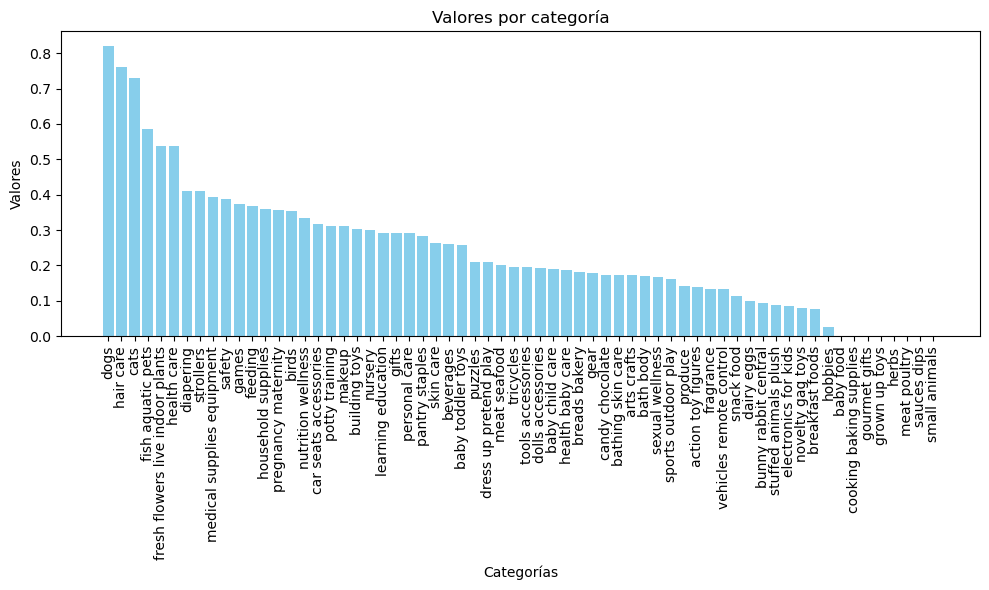

In [11]:
import matplotlib.pyplot as plt

# String de datos proporcionado
data_str = """fragrance: 0.8618677042801557
hair care: 0.8357933579335793
makeup: 0.8297872340425532
beverages: 0.8186046511627907
fish aquatic pets: 0.7746478873239436
games: 0.7702702702702703
fresh flowers live indoor plants: 0.7692307692307693
cats: 0.7331932773109243
personal care: 0.7272727272727273
household supplies: 0.7182320441988951
diapering: 0.7132352941176471
pregnancy maternity: 0.6428571428571429
feeding: 0.631578947368421
birds: 0.6274509803921569
candy chocolate: 0.6136363636363636
dogs: 0.6045714285714285
dress up pretend play: 0.5871559633027523
vehicles remote control: 0.5866666666666667
building toys: 0.5842696629213483
car seats accessories: 0.5789473684210527
puzzles: 0.5777777777777777
snack food: 0.5633802816901409
health care: 0.5617283950617284
skin care: 0.5578512396694215
medical supplies equipment: 0.5550239234449761
dolls accessories: 0.5522388059701493
tricycles: 0.5490196078431373
gear: 0.5476190476190477
nursery: 0.5470085470085471
safety: 0.5222222222222223
nutrition wellness: 0.49668141592920356
pantry staples: 0.49166666666666664
learning education: 0.4720496894409938
strollers: 0.45454545454545453
arts crafts: 0.4444444444444444
sports outdoor play: 0.43548387096774194
sexual wellness: 0.43157894736842106
gifts: 0.4166666666666667
breakfast foods: 0.38461538461538464
health baby care: 0.375
potty training: 0.375
action toy figures: 0.3739130434782609
baby toddler toys: 0.3669064748201439
stuffed animals plush: 0.36024844720496896
bunny rabbit central: 0.3333333333333333
breads bakery: 0.3181818181818182
tools accessories: 0.3116883116883117
bath body: 0.29577464788732394
baby child care: 0.24324324324324326
novelty gag toys: 0.23684210526315788
electronics for kids: 0.23404255319148937
meat seafood: 0.2
hobbies: 0.17333333333333334
produce: 0.14285714285714285
bathing skin care: 0.13043478260869565
dairy eggs: 0.1
small animals: 0.09090909090909091
gourmet gifts: 0.047619047619047616
baby food: 0.0
cooking baking supplies: 0.0
grown up toys: 0.0
herbs: 0.0
meat poultry: 0.0
sauces dips: 0.0"""

# Parsear los datos en listas separadas de nombres de categorías y valores asociados
names = []
values = []
for line in data_str.split('\n'):
    name, value = line.split(': ')
    names.append(name)
    values.append(float(value))

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(names, values, color='skyblue')  # Gráfica de barras vertical
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Valores')  # Etiqueta del eje y
plt.title('Valores por categoría')  # Título de la gráfica
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar la gráfica
